In [1]:
def iacos(s, t, theta, phi):
    r, c = np.indices(s)
    tc = t / np.cos(theta)
    tr = t / np.sin(theta)
    f = np.cos(2*np.pi*(r/tr + c/tc) + phi)
    return f
def iatile(f, new_size):

    f = np.array(f)
    if len(f.shape) == 1: f = f[newaxis,:]

    aux = np.resize(f, (new_size[0], f.shape[1]))
    aux = np.transpose(aux)
    aux = np.resize(aux, (new_size[1], new_size[0]))
    g = np.transpose(aux)
    return g
def iaidft(F):

    s = F.shape
    if F.ndim == 1: F = F[np.newaxis,np.newaxis,:] 
    if F.ndim == 2: F = F[np.newaxis,:,:] 

    p,m,n = F.shape
    A = ia.dftmatrix(m)
    B = ia.dftmatrix(n)
    C = ia.dftmatrix(p)
    Faux = np.conjugate(A).dot(F)
    Faux = Faux.dot(np.conjugate(B))
    f = np.conjugate(C).dot(Faux)/(np.sqrt(p)*np.sqrt(m)*np.sqrt(n))

    return f.reshape(s)

# Illustrate discrete cosine wave and its DFT showing its periodic nature

This demonstration illustrates the computation of the DFT - Discrete Fourier Transform of a particular discrete cosine wave. We realized that depending on the wave length and angle chosen, its DFT is not a pair of complex conjugate points. The demonstration shows the reason of this by calling the periodic nature of the DFT and when four discrete cosine waves are tiled together, it becomes evident that the wave is not an ideal discrete cosine wave. The demonstration goes on by computing the nearest normalized frequencies and and computes a new discrete cosine wave from the inverse DFT of a single pair of complex conjugate placed at the nearest normalized frequencies. In this case, when four images area tiled together, we see there are no abrupt changes in the boundaries of the images just tiled.

A discrete cosine wave of an image with size 256 columns and 128 rows, with wave length of 100 pixels at 45 degrees is computed and shown below.

In [2]:
import numpy as np
import sys,os

from math import pi, sin, cos, atan
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.colors as pltc

In [3]:
def normalize(f, range=[0,255]):

    f = np.asarray(f)
    range = np.asarray(range)
    if f.dtype.char in ['D', 'F']:
        raise Exception('error: cannot normalize complex data')
    faux = np.ravel(f).astype(float)
    minimum = faux.min()
    maximum = faux.max()
    lower = range[0]
    upper = range[1]
    if upper == lower:
        g = np.ones(f.shape) * maximum
    if minimum == maximum:
        g = np.ones(f.shape) * (upper + lower) / 2.
    else:
        g = (faux-minimum)*(upper-lower) / (maximum-minimum) + lower
    g = g.reshape(f.shape)

    if f.dtype == np.uint8:
        if upper > 255: 
            raise Exception('normalize: warning, upper valuer larger than 255. Cannot fit in uint8 image')
    if lower == 0 and upper == 255:
        g = g.astype(np.uint8)
    else:
        g = g.astype(f.dtype) # set data type of result the same as the input image
    return g

import math

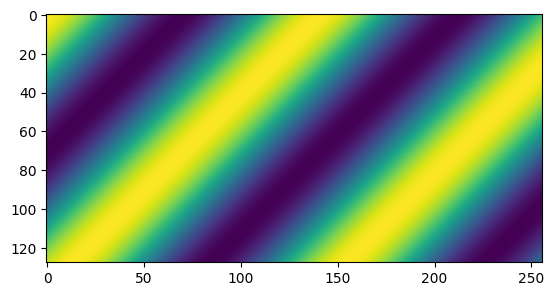

In [4]:
s = (128,256)
t = 100
theta = 45 * math.pi/180
f = iacos(s, t, theta, 0)
plt.imshow(normalize(f))

In [5]:
import numpy as np
import dftmatrix

def dft(f):
    f = np.asarray(f).astype(np.float64)
    if (len(f.shape) == 1):
        m = len(f)
        A = dftmatrix.dftmatrix(f.shape[0])
        F = np.sqrt(m) * A.dot(f)
    elif (len(f.shape) == 2):
        (m, n) = f.shape
        A = dftmatrix.dftmatrix(m)
        B = dftmatrix.dftmatrix(n)
        F = np.sqrt(m * n) * (A.dot(f)).dot(B)
    else:
        (p,m,n) = f.shape
        A = dftmatrix.dftmatrix(m)
        B = dftmatrix.dftmatrix(n)
        C = dftmatrix.dftmatrix(p)
        Faux = A.dot(f)
        Faux = Faux.dot(B)
        F = np.sqrt(p)*np.sqrt(m)*np.sqrt(n)*C.dot(Faux)   
    return F


In [6]:
sys.path.append( '../../master' )

In [13]:
print(sys.path)

['/home/ic-unicamp/git/other/image_processing_23/master/function', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/ic-unicamp/.local/lib/python3.10/site-packages', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '../../master', '../master', '../master', '../master']


In [12]:
sys.path.append( '../master' )
from function import dftshift
from function import normalize

def dftview(F):
    

    FM = dftshift.dftshift(np.log(np.abs(F)+1))
    return normalize.normalize(FM).astype(np.uint8)



The computation of its DFT - Discrete Fourier Transform reveals that the result is not a single pair of complex conjugate points, but also a number of points in the vertical and horizontal directions. This behavior has to do with abrupt changes in the image. As both the DFT and the image are periodic, we place four images as tiles. We can see that when these images are tiled together, there are many abrupt changes in the images as they do not fit together as a single cosine wave.

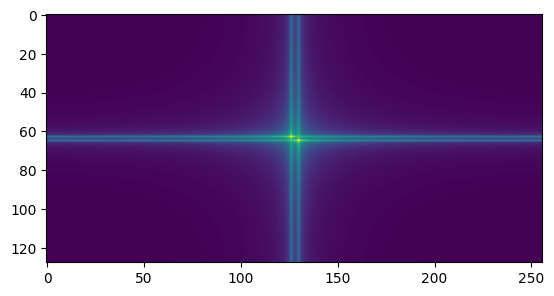

In [14]:
F = dft(f)
plt.imshow(dftview(F))


In [18]:
imshape = 2 * np.array(np.shape(f))
imsow = iatile(normalize(f), imshape)
plt.imshow(imsow)

TypeError: 'module' object is not callable

From the wave length 100 and angle 45 degrees, we compute the value of the normalized horizontal and vertical frequencies and and noticed that they are not integers and so there is no correspondence to an ideal cosine wave in the discrete Fourier domain:

In [ ]:
u = s[1] * cos(theta) / t
v = s[0] * sin(theta) / t
print('u,v = ', u,v)

The nearest integer u and v are 2 and 1, respectively. We create an synthetic Discrete Fourier image with a single pair of complex conjugate points at this nearest integer u and v.

In [ ]:
ui, vi = round(u), round(v)
print('ui,vi = ', ui, vi)
FS = np.zeros(s)
FS[vi,ui] = 1
FS[s[0]-vi, s[1]-ui] = 1
print('FS is complex conjugate? ',ia.isccsym(FS))
ia.adshow(ia.dftview(FS),title='DFT of a single pair of complex conjugate points')

Computing the inverse DFT we can find the correspondent cosine wave. We observe now that tiling 4 images together, there are no abrupt changes in the boundaries. We compute the equivalent wave length and angle, and we notice that the nearest ideal cosine wave has now a wavelength of 90.5 pixels instead of 100, in the same direction (45 degrees).

In [ ]:
fs = np.real(iaidft(FS))
ia.adshow(ia.normalize(fs), title='fs - ideal cosine wave')
ia.adshow(iatile(ia.normalize(fs), 2 * np.array(np.shape(fs))), title='fs tiled 4 times')
txi,tyi = s[1]/ui, s[0]/vi
thetai = atan(tyi/txi)
ti = txi * cos(thetai)
print('new period and angle = ', ti, thetai * 180/pi)

We place both the original cosine wave and the ideal cosine wave together for comparison.

In [ ]:
ia.adshow(ia.normalize(f), title='f - cosine wave with period 100 pixels')
ia.adshow(ia.normalize(fs), title='fs - ideal cosine wave with period 90.5 pixels')